# installing libraries (installed already)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# import csv file(diwali_data)

In [15]:
df = pd.read_csv("C:\\Users\\sanch\\Downloads\\Python_Diwali_Sales_Analysis-main\\Python_Diwali_Sales_Analysis-main\\Diwali Sales Data.csv", encoding='latin-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Gathering general knowledge of dataset

In [17]:
df.shape

(11251, 15)

In [20]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Drop null columns and drop na values from dataset

In [23]:
#find null value columns 

df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [26]:
#drop status and unnamed1 column from dataframe

df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [30]:
#drop nan values from amout

df.dropna(inplace=True)

# change data type of amount col float to int & also change name of Gender to Sex

In [32]:
#change dtype of amount to an int

df['Amount'] = df['Amount'].astype(int)

In [38]:
#change name of Gender to Sex

df.rename(columns={'Gender':'Sex'},inplace=True)

# Exploratory Data Analysis

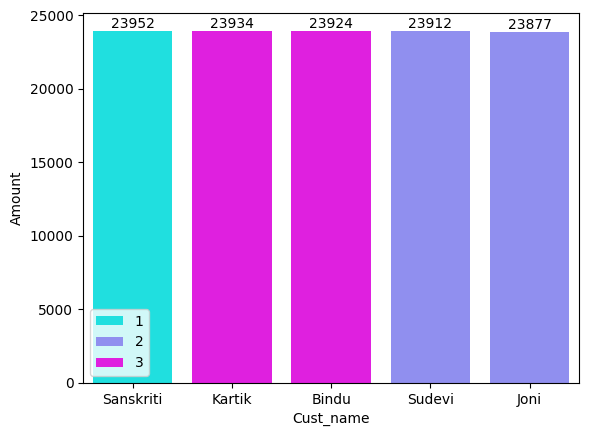

In [70]:
#top 10 customers who spent max

df_sorted = df.sort_values(by='Amount',ascending=False).head(5)
ax1 = sns.barplot(x="Cust_name",y='Amount',data=df_sorted,hue='Orders',palette='cool',estimator=sum)
plt.legend(loc=3)
for bar in ax1.containers:
    ax1.bar_label(bar)

# Gender

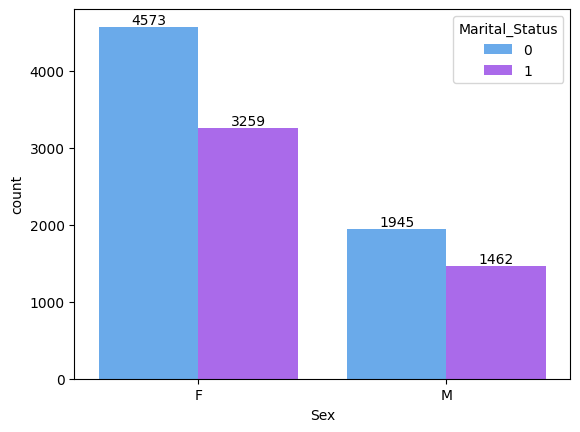

In [60]:
#plot a count chart on sex
warnings.filterwarnings("ignore", category=FutureWarning)   #remove user warning

ax = sns.countplot(x='Sex',data=df,palette='cool',hue='Marital_Status')
for bar in ax.containers:
    ax.bar_label(bar)

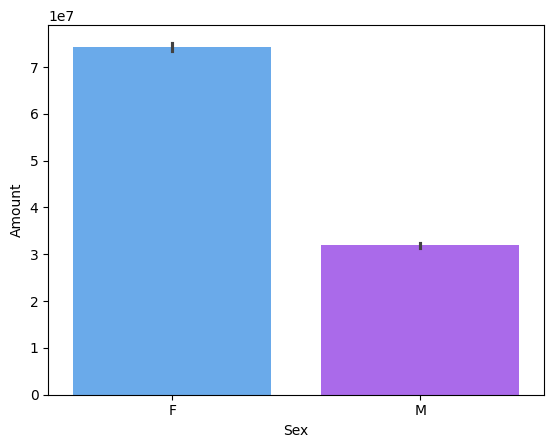

In [63]:
ax = sns.barplot(x='Sex',y='Amount',data=df,estimator=sum, palette='cool')

from above charts conclude that females dominates in count as well as purchasing power of females are high

# Age

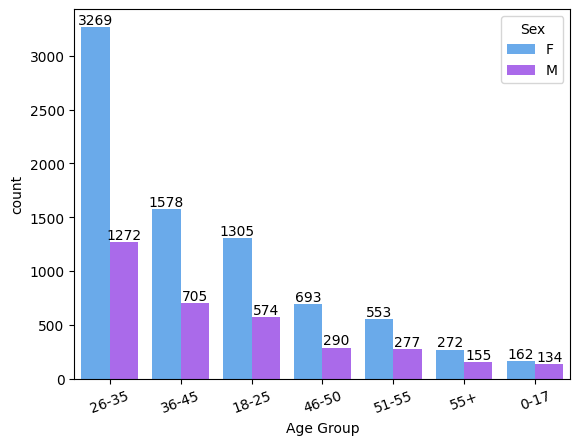

In [84]:
#count age group on basis of sex

sorted_order = df['Age Group'].value_counts().index
ax = sns.countplot(x='Age Group',data=df,hue='Sex',order=sorted_order,palette='cool')
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation=20)
plt.show()

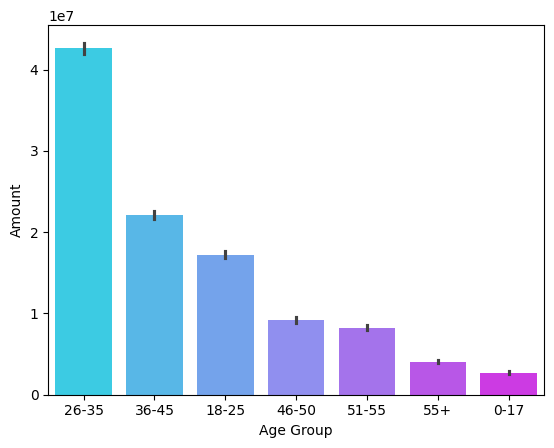

In [89]:
sorted_order = df['Age Group'].value_counts().index
ax = sns.barplot(x='Age Group',y='Amount',data=df,estimator=sum,palette='cool', order=sorted_order)

above the graphs we can see most of the buyers from 26-35yrs and are females

# State

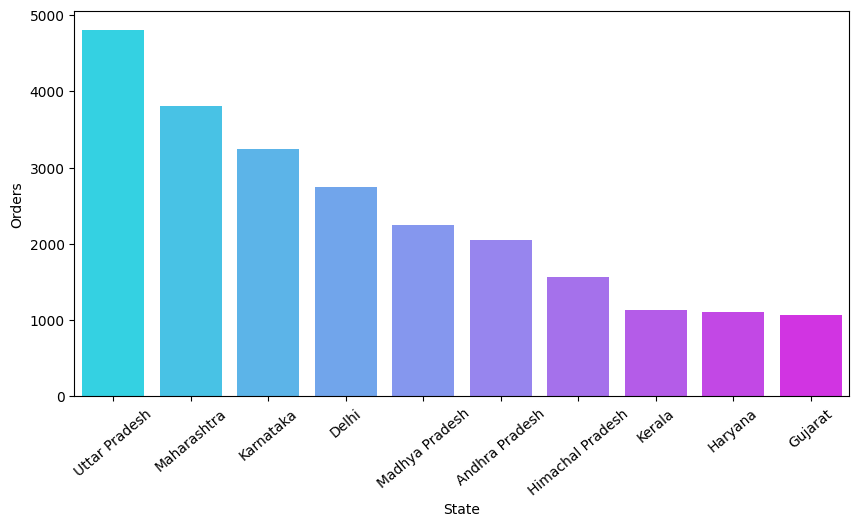

In [127]:
#top 10 states with highest orders
order_sort = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='State',y='Orders',data=order_sort, palette='cool')
plt.xticks(rotation=40)
plt.show()


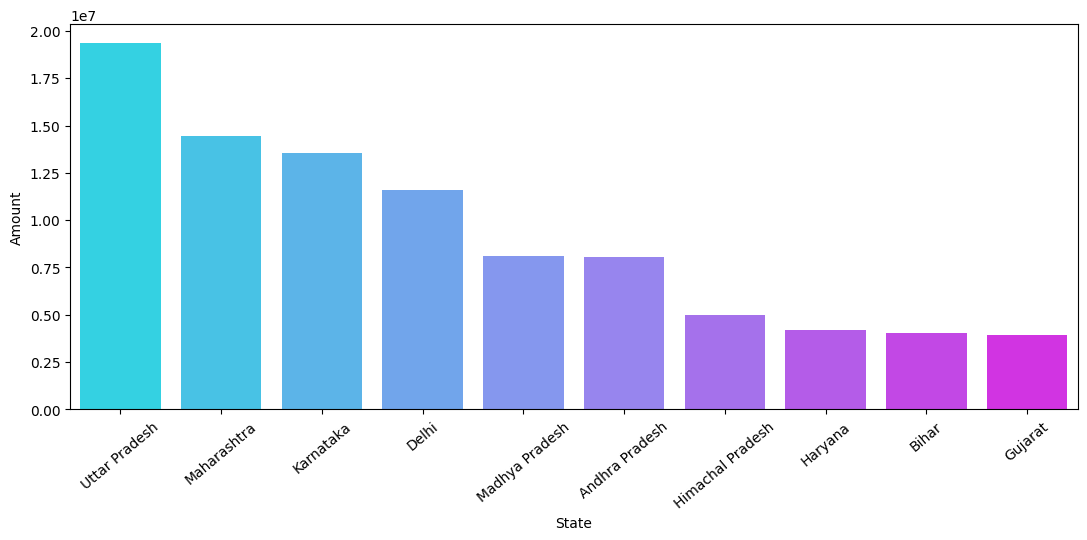

In [135]:
#total amount / states

plt.figure(figsize=(13,5))

ax= df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.barplot(x='State',y='Amount',data=ax,palette='cool',width=.8)
plt.xticks(rotation=40)
plt.show()

from above graph we can see most of the orders & total sales/amount are from UP, Maharastra and Karnatka respectively

# Marital Status

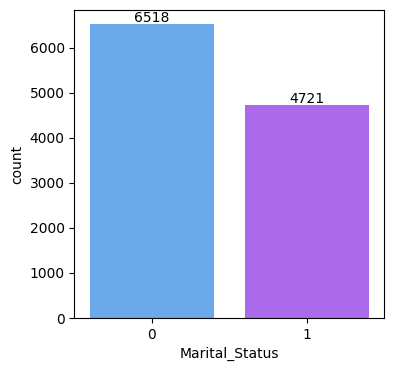

In [146]:
#how much our customer are married and unmarried

plt.figure(figsize=(4,4))
ax = sns.countplot(x='Marital_Status',data=df,palette='cool')
for i in ax.containers:
    ax.bar_label(i)

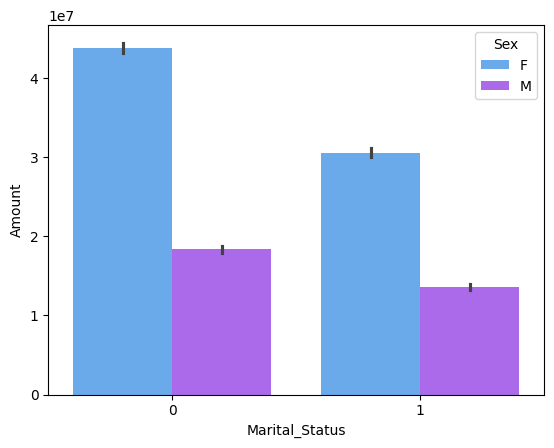

In [200]:
#Amount/Marital sales on sex


sns.barplot(x='Marital_Status',y='Amount',data=df,hue='Sex',palette='cool',estimator=sum)

plt.show()

from above graph most of the customers are married women and they have high purchasing power

# Occupation

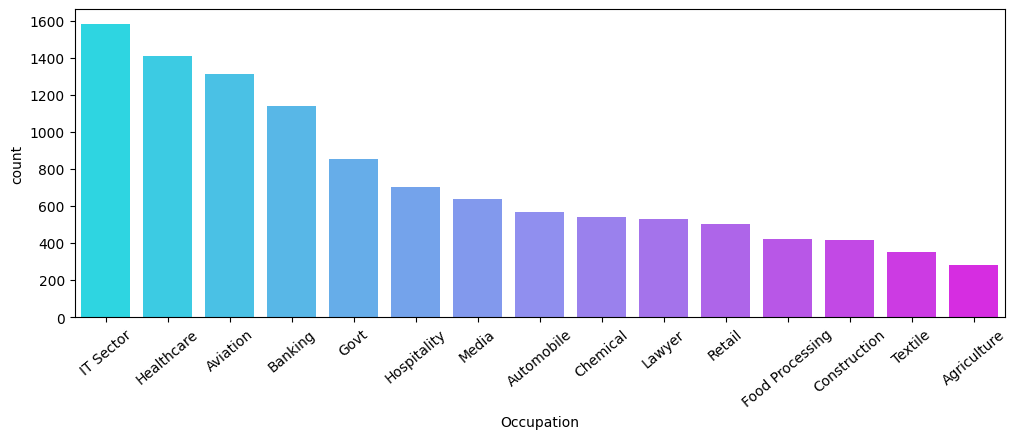

In [189]:
#sector customers count
plt.figure(figsize=(12,4))
dfs = df['Occupation'].value_counts().index
ax = sns.countplot(x='Occupation',data=df,palette='cool',order=dfs)
plt.xticks(rotation=40)
plt.show()

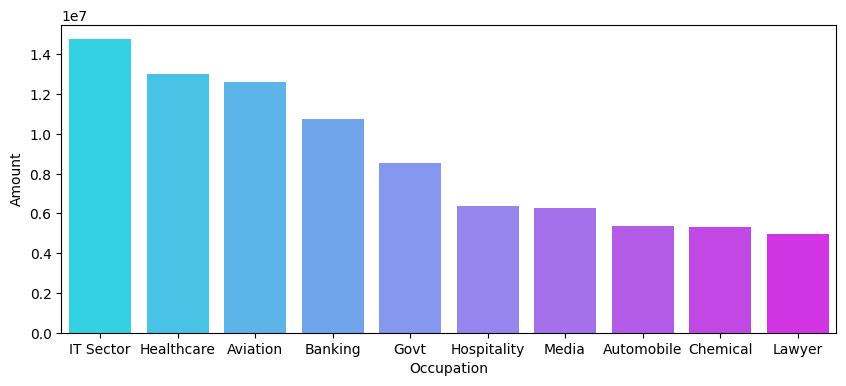

In [190]:
#top 10 sectors customers on purchasing amount
plt.figure(figsize=(10,4))
oc_sorted = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.barplot(x='Occupation',y='Amount',data=oc_sorted,palette='cool')
plt.show()

from the above graph we can see most of the customers from IT,Healthcare and Aviation sector

# Product Category

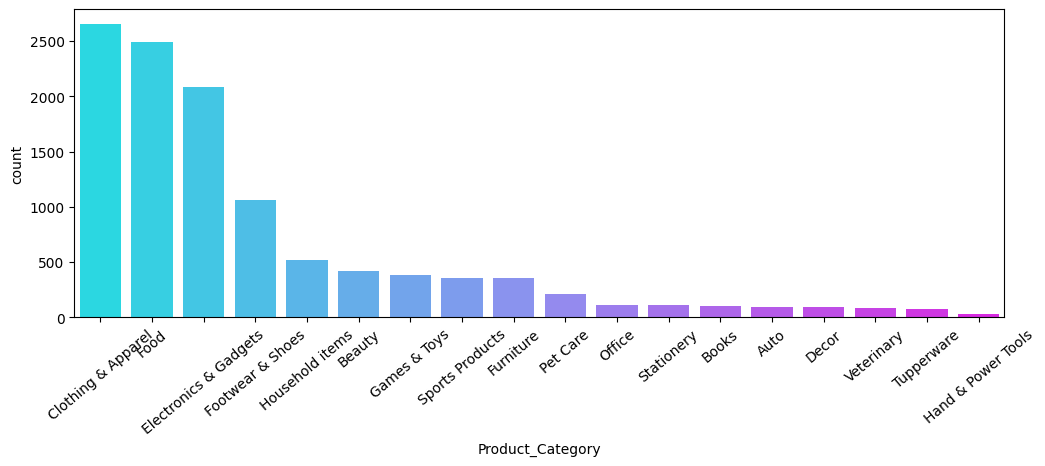

In [196]:
#most product selling 

plt.figure(figsize=(12,4))
pr_sort = df['Product_Category'].value_counts().index
sns.countplot(x='Product_Category',data=df,palette='cool',order=pr_sort)
plt.xticks(rotation=40)
plt.show()

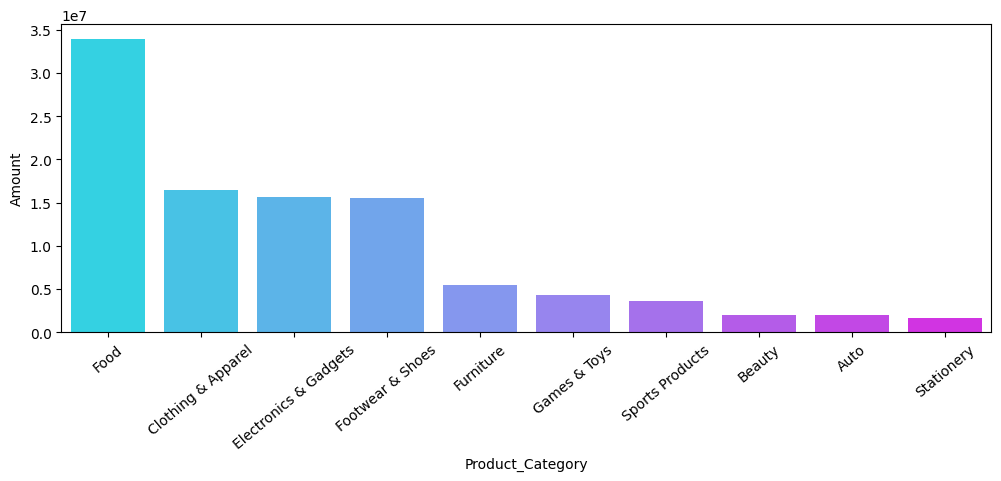

In [202]:
#per product total sales
plt.figure(figsize=(12,4))

pr_sort = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='Product_Category',y='Amount',data=pr_sort,palette='cool')

plt.xticks(rotation=40)
plt.show()

from above graph most selling products are food,clothing and electronics & gadgets

# Product ID

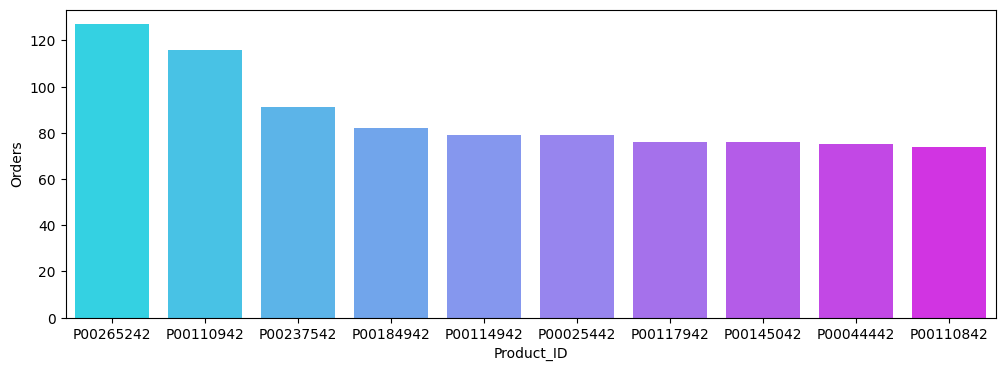

In [209]:
#which product has most demanded
plt.figure(figsize=(12,4))
ax = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(x='Product_ID',y='Orders',data=ax,palette='cool')
plt.show()

# Conclusion:-

Married women age group 26-35 yrs from UP,Maharastra & Karnataka Working in IT, Healthcare & Aviation are more likely to buy products from Food, Clothing & Electronics and Gadgets.